 ****Information about our data****
 
"Supermarket_sales" is a public dataset on Kaggle.

The data contains such columns:

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

**Python Libraries**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Read Data And Get Information**

In [40]:
df = pd.read_csv(r"supermarket_sales - Sheet1.csv")

In [41]:
# to show num of columns and rows 
df.shape

(1000, 18)

In [42]:
# to look for a few rows // instance // samples 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,new gi
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,24.896667
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3.638095
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,15.443333
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,22.179048
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,28.770000


In [43]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,new gi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,14.647018
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,11.151262
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,0.484286
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,5.642738
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,11.512381
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,21.376429
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,47.285714


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**cleaning data**

In [45]:
# Find Frequency of Items
df.sum()


Invoice ID                 750-67-8428226-31-3081631-41-3108123-19-117637...
Branch                     ACAAACACABBBAAABAAABCBBAAABABABBBACCAACBBCBCCB...
City                       YangonNaypyitawYangonYangonYangonNaypyitawYang...
Customer type              MemberNormalNormalMemberNormalNormalMemberNorm...
Gender                     FemaleFemaleMaleMaleMaleMaleFemaleFemaleFemale...
Product line               Health and beautyElectronic accessoriesHome an...
Unit price                                                          55672.13
Quantity                                                                5510
Tax 5%                                                             15379.369
Total                                                             322966.749
Date                       1/5/20193/8/20193/3/20191/27/20192/8/20193/25/...
Time                       13:0810:2913:2320:3310:3718:3014:3611:3817:151...
Payment                    EwalletCashCredit cardEwalletEwalletEwalletEwa...

In [46]:
# to show missing values in my data 
#df.isnull().sum()
missing_values_count = df.isnull().sum()
print (missing_values_count)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
new gi                     0
dtype: int64


In [47]:
# if we have big data to look at the # of missing points in the first ten columns
missing_values_count[0:10]

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
dtype: int64

In [48]:
# remove all the rows that contain a missing value
#if we have but we don't have !!!
#df.dropna()

In [49]:
# remove all columns with at least one missing value
#if we have but we don't have !!!
# columns_with_na_dropped = df.dropna(axis=1) # axis=1 for columns 
# columns_with_na_dropped.head()

In [50]:
# just how much data did we lose?
# print("Columns in original dataset: %d \n" % df.shape[1])
# print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

In [51]:
# function from the pandas library to convert the values in the "Date" column to datetime objects
#and assigns the converted datetime objects back to the "Date" column in the DataFrame
df["Date"]=pd.to_datetime(df.Date)
df["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [52]:
# This part extracts the month names from the datetime objects in the "Date" column. It converts the numeric month values (e.g.,jan,feb,.......) 1 for January, 2 for February) into their corresponding full month names
df["Month"]=df["Date"].dt.month_name()
df["Month"]

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

In [53]:
# I think "Invoice ID" not important so we need to drop it 
df.drop(columns="Invoice ID",inplace=True)

In [54]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,new gi,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,24.896667,January
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3.638095,March
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,15.443333,March
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,22.179048,January
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,28.770000,February


**Visualization Data**

In [55]:
df.Branch.value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

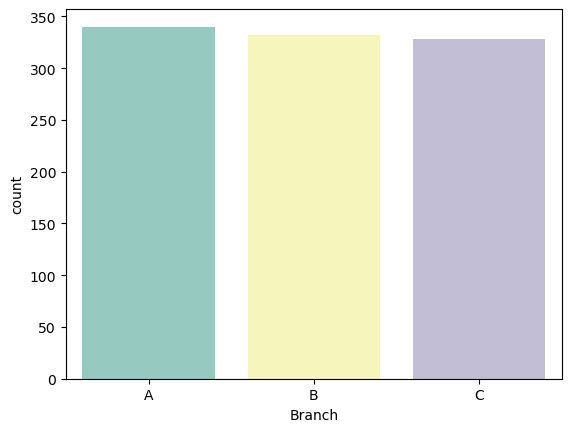

In [62]:
#countplot function from Seaborn is used to create a count plot
#it is consider a bar plot that shows the count of each category in a categorical variable.
#value_counts() function to count the occurrences of each category
# palette="Set1": This parameter specifies the color palette to be used in the plot. ex: set1 , set2 , set3 
#plt.show(): This line displays the plot using Matplotlib's.
#Orders the bars on the x-axis based on the count of each category in the "Branch" column
#value_counts() function to count the occurrences of each category and then extracts the index (Branch names) of the resulting Series
graph=sns.countplot(data=df,x="Branch",order=df.Branch.value_counts().index,palette="Set3")
plt.show()

From graph

we have 3 Branch 

A branch is the largest

B branch is the least

In [63]:
df["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

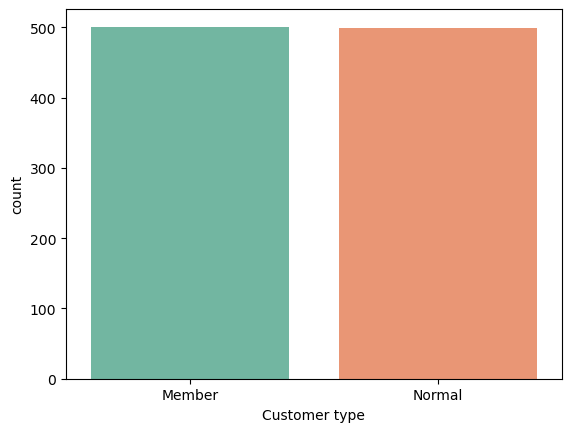

In [66]:

sns.countplot(data=df,x="Customer type",order=df["Customer type"].value_counts().index,palette="Set2")
plt.show()

From graph

There is a strong convergence between member and normal 

member is already buy more than normal 

In [67]:
df.Gender.value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

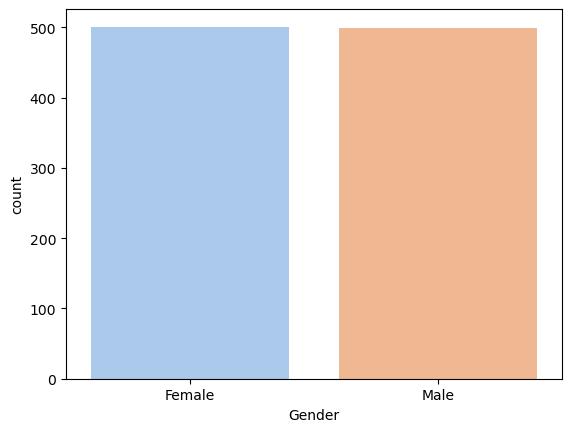

In [71]:
# type of palette in deep seaboarn
#muted,bright,pastel,dark,colorblind,husl,(Set1, Set2, Set3),(tab10, tab20, tab20b, tab20c)

sns.countplot(data=df,x="Gender",order=df.Gender.value_counts().index,palette="pastel")
plt.show()

from graph 

we show female is more than male 

In [72]:
df["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

**which product people buy it the most?**

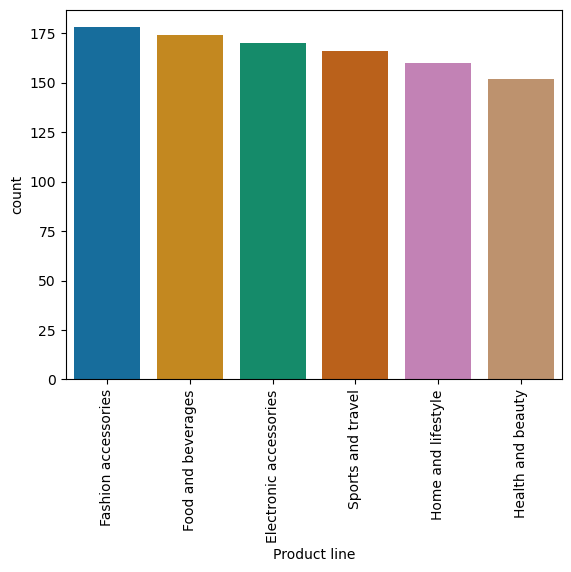

In [76]:
graph=sns.countplot(data=df,x="Product line",order=df["Product line"].value_counts().index,palette="colorblind")
#Rotates the x-axis tick labels by 90 degrees for better readability.
#plt.setp from Matplotlib to set properties of the x-axis tick labels.
_=plt.setp(graph.get_xticklabels(),rotation=90)
plt.show();

From graph

Fashion accessories is the most product sold

**which mode of paymwnt is heigh?**

In [77]:
df.Payment.value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

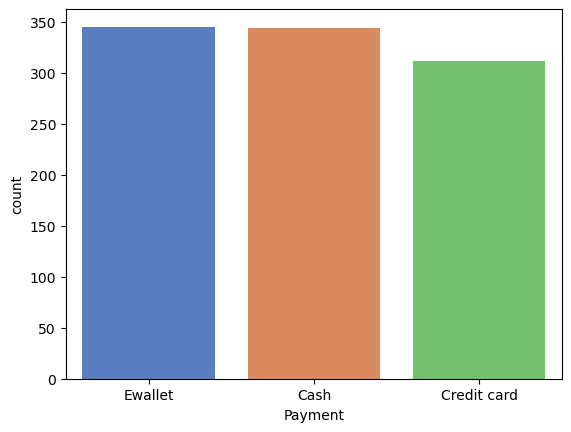

In [78]:
sns.countplot(data=df,x="Payment",order=df["Payment"].value_counts().index,palette="muted")
plt.show()

from graph 

we show that most of people prefer to pay by Ewallet

In [79]:
df.Rating.unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


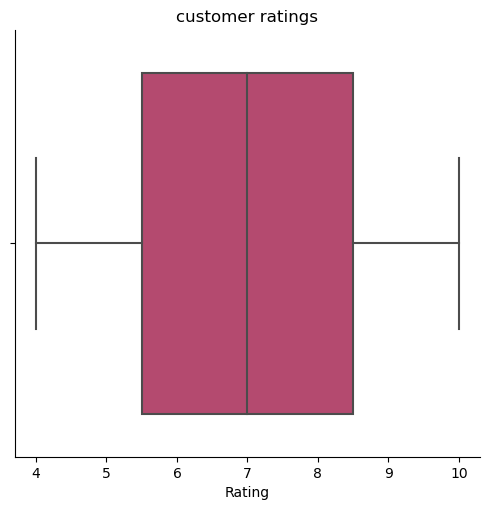

In [86]:
# catplot function is a figure-level interface for drawing categorical plots. In this case, it's creating a box plot
#kind="box": Specifies the type of plot to create. In this case, it's a box plot
#types of kind 
#{("strip": A strip plot is a scatter plot where one of the "variables is categorical". It shows individual data points.)
#"swarm": Similar to a strip plot, but points are adjusted to avoid "overlap", providing a better representation of the distribution.
#box": Creates a box plot, which is a graphical summary of the" distribution" of a dataset.
#"violin": A combination of a box plot and a kernel "density" estimation plot, providing information about both the central tendency and distribution.
#"bar": Creates a "bar plot", where the height of the bars represents the mean or another statistical measure of the variable.
#"count": Displays the "count of observations" in each category as bars.}.
sns.catplot(data=df,x="Rating",kind="box",color="#C63869")
#Adds a title to the plot
plt.title("customer ratings")
plt.show()

from graph 

we see that most of rating in average 7 


In [87]:
df.Month.value_counts()

Month
January     352
March       345
February    303
Name: count, dtype: int64

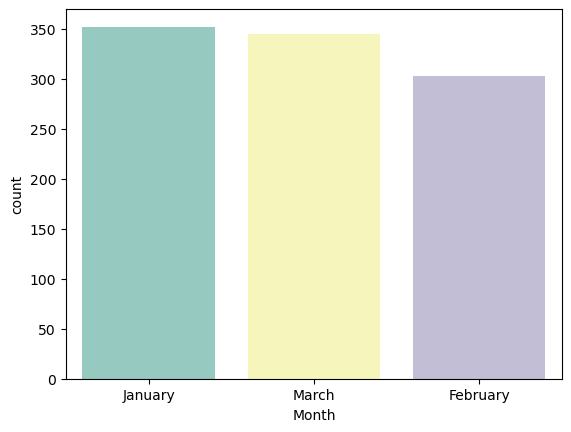

In [89]:
sns.countplot(data=df,x="Month",order=df["Month"].value_counts().index,palette="Set3")
plt.show()

we see most sales in january

**what is the the distribution of gross income for each branch?**

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


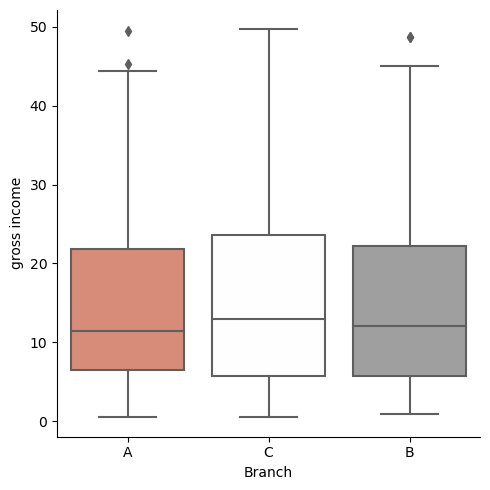

In [94]:
# the box plot will show the distribution of gross income for each branch.
sns.catplot(data=df,x="Branch",y="gross income",kind="box",palette="RdGy")
plt.show()

**which is the branch has most men and women buy to increase the type of product line acording each branch?**

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


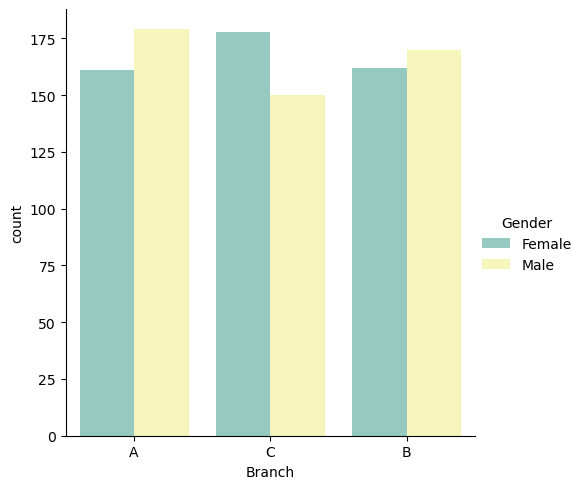

In [92]:
#hue="Gender": Specifies the variable to differentiate by color (hue)
#the bars will be grouped by both "Branch" and "Gender",and different colors will be used to represent different genders within each branch.
sns.catplot(data=df,x="Branch",hue="Gender",palette="Set3",kind="count")
plt.show()

I think according this graph 

branch A :  has most male buy  ( we can increase product line related to men )

branch B : has most female buy ( we can increase product line related to women )

branch c: is equal 

**Does way of payment affect rating?**

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


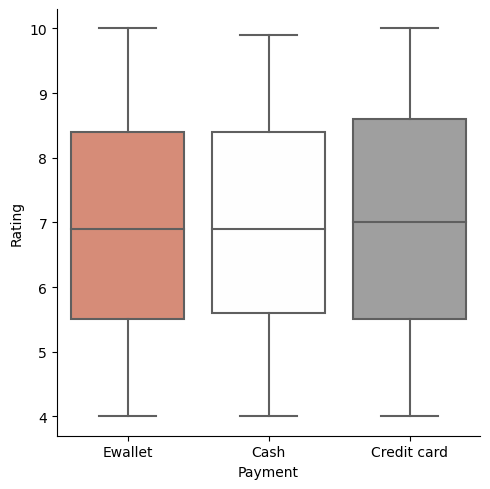

In [96]:
sns.catplot(data=df,x="Payment",y="Rating",kind="box",palette="RdGy")
plt.show()

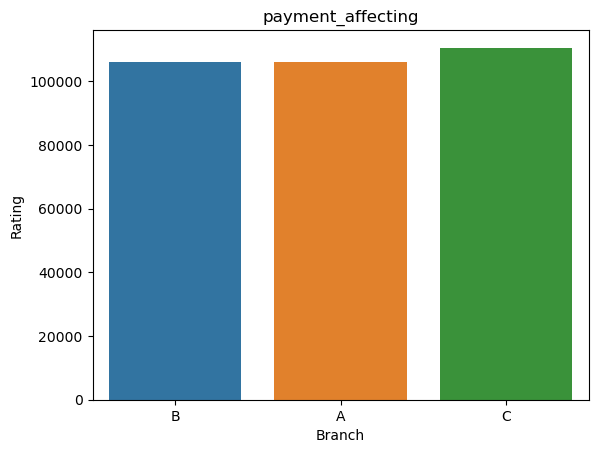

In [101]:
# by group by 
payment_affecting = df.groupby('Payment')['Rating'].sum().sort_values()
sns.barplot(x=branch_sales.index, y=branch_sales.values)
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.title('payment_affecting')
plt.show()


In [102]:
payment_affecting

Payment
Credit card    2178.0
Ewallet        2397.0
Cash           2397.7
Name: Rating, dtype: float64

I think , it is not affect more 

there is little difference in each branch




**Is there a relation between way of payment and product line?**

i think it is not مفييييييييييد

**Which Product line has higher sales in Each Branch**

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


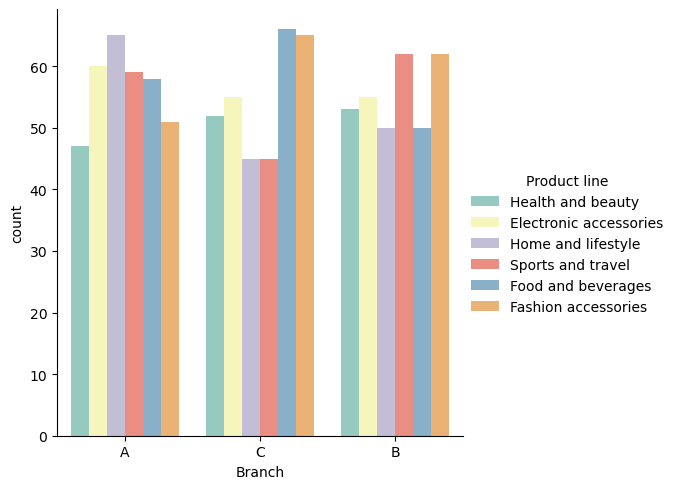

In [105]:
sns.catplot(data=df,x="Branch",hue="Product line",palette="Set3",kind="count")
plt.show()


I think we have variance of each branch but 

A: most buying in home and lifestyle

B:fashion accesoris , food and beverages

c:sports


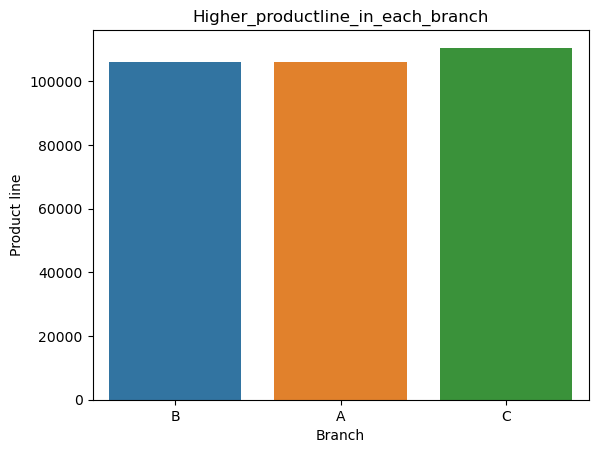

In [106]:
# Higher_productline_in_each_branch = df.groupby('Branch')['Product line'].sum().sort_values()
# sns.barplot(x=branch_sales.index, y=branch_sales.values)
# plt.xlabel('Branch')
# plt.ylabel('Product line')
# plt.title('Higher_productline_in_each_branch')
# plt.show()

In [107]:
Higher_productline_in_each_branch

Branch
C    Electronic accessoriesElectronic accessoriesHo...
B    Food and beveragesFashion accessoriesElectroni...
A    Health and beautyHome and lifestyleHealth and ...
Name: Product line, dtype: object

**Which gender has higher average for sales?**

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


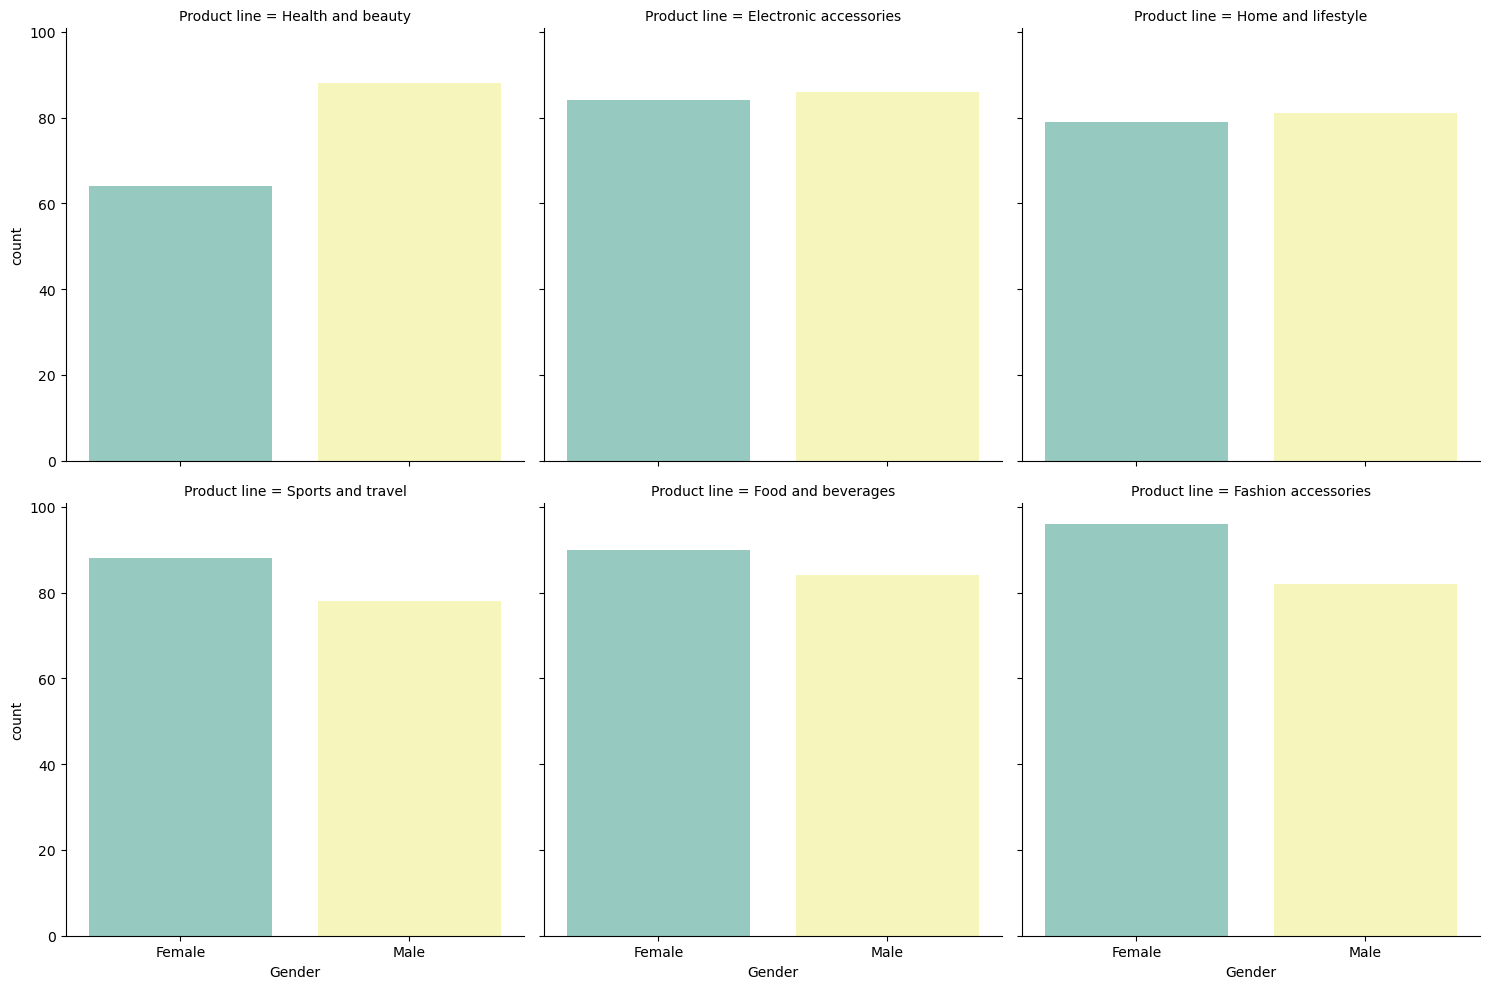

In [115]:
sns.catplot(data=df,x="Gender",col="Product line",col_wrap=3,kind="count",palette="Set3")
plt.show()

**Is there a relation between gross income and month?**

In [133]:
month_related_gross = df.groupby('Month')['gross income'].sum()
month_related_gross

Month
February    4629.494
January     5537.708
March       5212.167
Name: gross income, dtype: float64

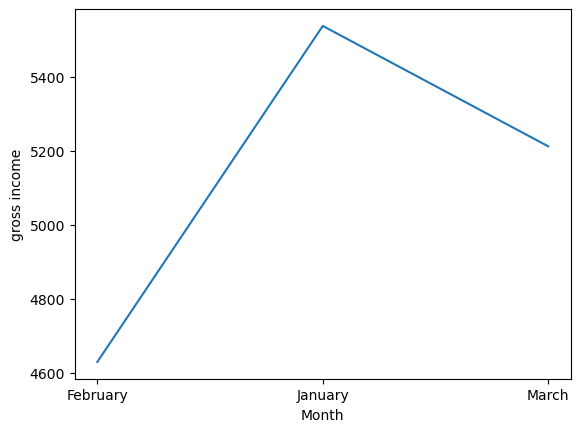

In [134]:
sns.lineplot(x = month_related_gross.index, y = month_related_gross);

from graph

 we see  gross income is very high in jan

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


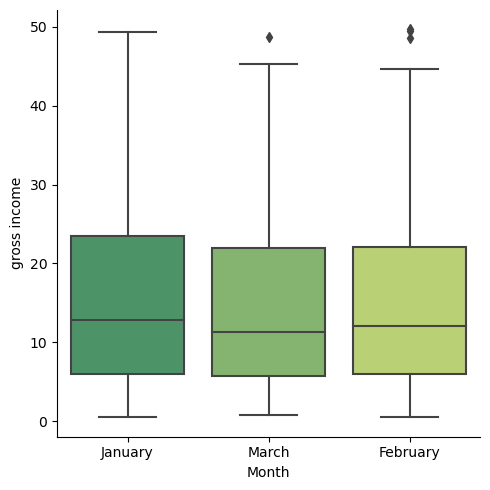

In [135]:
sns.catplot(data=df,x="Month",y="gross income",kind="box",palette="summer")
plt.show()

**what is the gross income for each city?**

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


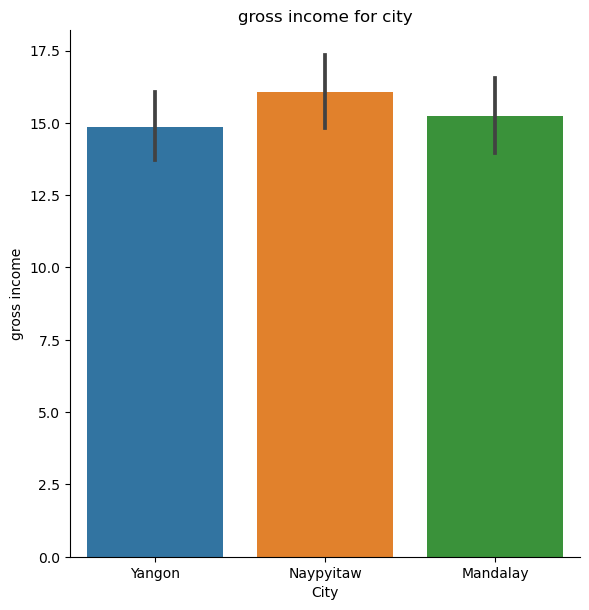

In [136]:
sns.catplot(data=df,x="City",y="gross income",kind="bar",height=6)
plt.title("gross income for city")
plt.show()

**which branch has the higest total income?**

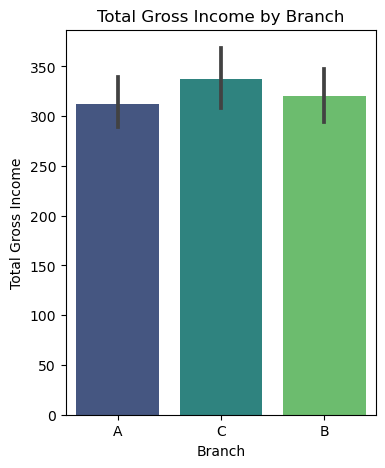

In [140]:
branch_revenue=df.groupby('Branch')['Total'].sum().reset_index()
plt.figure(figsize=(4, 5))
sns.barplot(x='Branch', y='Total', data=df, palette='viridis')
plt.title('Total Gross Income by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Gross Income')
plt.show()

we see that C has the heighest income 
 
I think they are clever

**which branch has heighest gross income?**

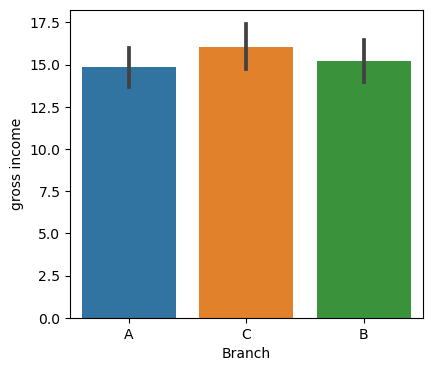

In [144]:
plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# plt.pie('gross income',labels='Branch',data=df)
plt.subplot(1,2,2)
sns.barplot(x='Branch',y='gross income',data=df);

it is normal to be c because they has the heighest total also

In [139]:
# Products with highest rating

df[df['Rating']==10]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,new gi,Month
60,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,3.534286,February
62,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,23.601429,February
159,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,26.682857,March
387,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,15.390476,February
853,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,25.138095,February
